In [1]:
from algorithms import *
from evaluators import *
import matplotlib.pyplot as plt
import numpy as np
import warnings

np.random.seed(42)
warnings.filterwarnings("ignore")

{'alpha1': 34.73, 'alpha2': 49.36, 'alpha3': 32.73, 'alpha4': 49.54, 'delta1': 1.93, 'delta2': 0.69, 'Kd': 10.44, 'n': 4.35}


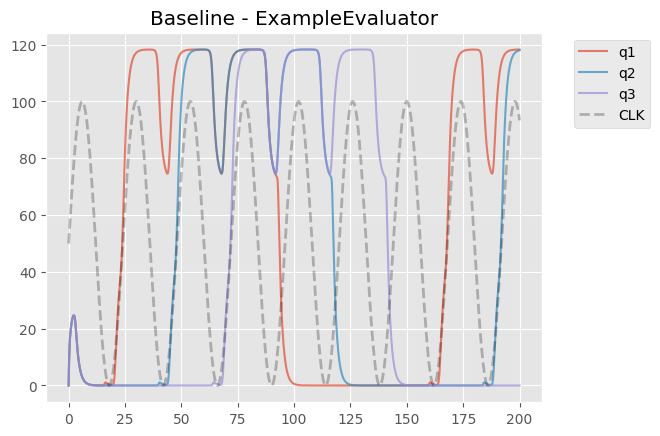

In [2]:
print(ExampleEvaluator().get_params())
ExampleEvaluator().simulate(algo='baseline')

In [3]:
def optimize(Algo, population=10, generations=10, is_export=False):    
    best_params = Algo(GoalEvaluator, is_export=is_export).optimize_parameters(population, generations)
    evaluation = GoalEvaluator(**best_params)
    
    print('-' * 100)
    print(evaluation.get_params())
    print(evaluation.evaluate())
    evaluation.simulate()

Generation 1/10
Best Fitness: 15000
Generation 2/10
Best Fitness: 13000
Generation 3/10
Best Fitness: 4604.002568152173
Generation 4/10
Best Fitness: 0.041729864720564155
Generation 5/10
Best Fitness: 0.003347401493933397
Generation 6/10
Best Fitness: 0.0005128910547608321
Generation 7/10
Best Fitness: 0.00018434182520660005
Generation 8/10
Best Fitness: 0.000542679391195349
Generation 9/10
Best Fitness: 0.0004113097683715293
Generation 10/10
Best Fitness: 528.7718804204164
Best Fitness: 528.7718804204164
----------------------------------------------------------------------------------------------------
{'alpha1': 39.711375693834015, 'alpha2': 16.88423527659282, 'alpha3': 26.30039958864486, 'alpha4': 20.53167802844763, 'delta1': 0.6608187877674236, 'delta2': 0.43447459068074556, 'Kd': 12.129838629310763, 'n': 13.437911230071311}
-14.822494801366602


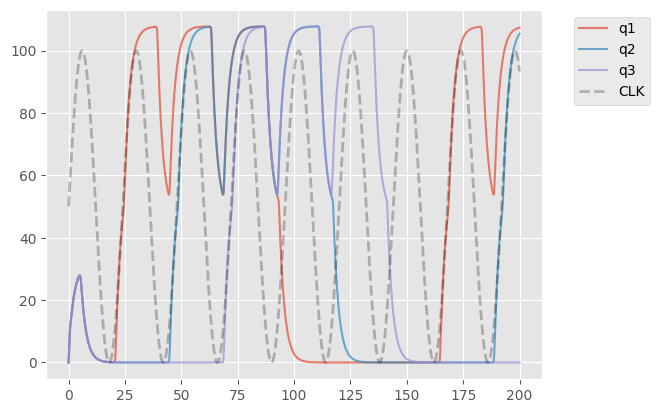

In [4]:
optimize(GreyWolfOptimizer, 10, 10, is_export=True)

[0] Update best with -1391.14810
[2] Update best with -939.54001
[8] Update best with -897.04213
[15] Update best with -420.60290
[26] Update best with -12.70047
[37] Update best with -6.08947
[61] Update best with -2.86209
[66] Update best with -1.57436
[68] Update best with -0.95051
[69] Update best with -0.00022
[71] Update best with -0.00018
[80] Update best with -0.00008
[81] Update best with -0.00008
[85] Update best with -0.00004
[88] Update best with -0.00002
[94] Update best with -0.00001
[95] Update best with -0.00001
----------------------------------------------------------------------------------------------------
{'alpha1': 44.970774817718066, 'alpha2': 44.97267806193415, 'alpha3': 45.145994637680886, 'alpha4': 31.956458273670208, 'delta1': 9.35694230627241, 'delta2': 2.165155147109703, 'Kd': 0.8654058631758217, 'n': 5.0}
-1.204755719028511e-05


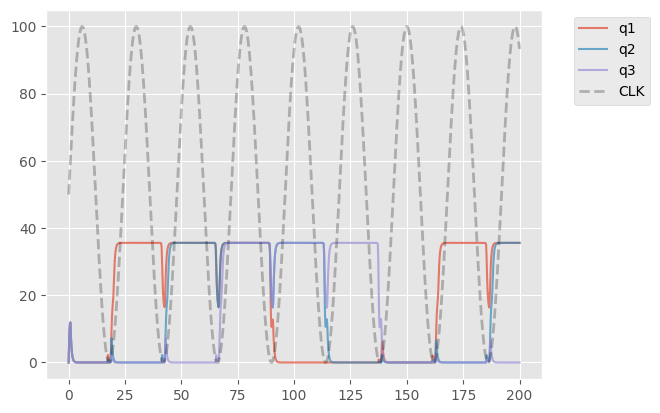

In [5]:
optimize(GeneticAlgorithm, 100, 100)

[0] Update best with -15000.00000
[1] Update best with -1923.29737
[13] Update best with -1277.89253
[20] Update best with -1220.42567
----------------------------------------------------------------------------------------------------
{'alpha1': 38.37308216830912, 'alpha2': 12.102158100879665, 'alpha3': 39.81460067767385, 'alpha4': 14.182513036851995, 'delta1': 55.29869537025904, 'delta2': 0.5077831009012245, 'Kd': 8.187454724369541, 'n': 2.748382688425716}
-1220.4256748740847


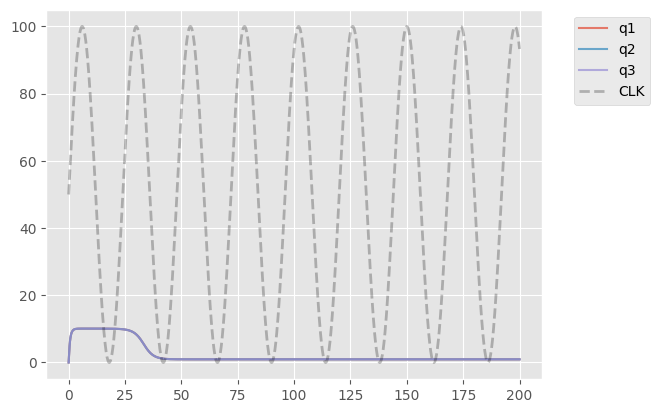

In [6]:
optimize(AntColonyOptimization, 100, 150)

Generation 1/150
Best Fitness: 15000
Generation 2/150
Best Fitness: 13000
Generation 3/150
Best Fitness: 13000
Generation 4/150
Best Fitness: 13000
Generation 5/150
Best Fitness: 13000
Generation 6/150
Best Fitness: 13000
Generation 7/150
Best Fitness: 13000
Generation 8/150
Best Fitness: 13000
Generation 9/150
Best Fitness: 13000
Generation 10/150
Best Fitness: 13000
Generation 11/150
Best Fitness: 13000
Generation 12/150
Best Fitness: 15000
Generation 13/150
Best Fitness: 13000
Generation 14/150
Best Fitness: 13000
Generation 15/150
Best Fitness: 13000
Generation 16/150
Best Fitness: 13000
Generation 17/150
Best Fitness: 13000
Generation 18/150
Best Fitness: 13000
Generation 19/150
Best Fitness: 13000
Generation 20/150
Best Fitness: 14000
Generation 21/150
Best Fitness: 13000
Generation 22/150
Best Fitness: 13000
Generation 23/150
Best Fitness: 13000
Generation 24/150
Best Fitness: 15000
Generation 25/150
Best Fitness: 13000
Generation 26/150
Best Fitness: 13000
Generation 27/150
Bes

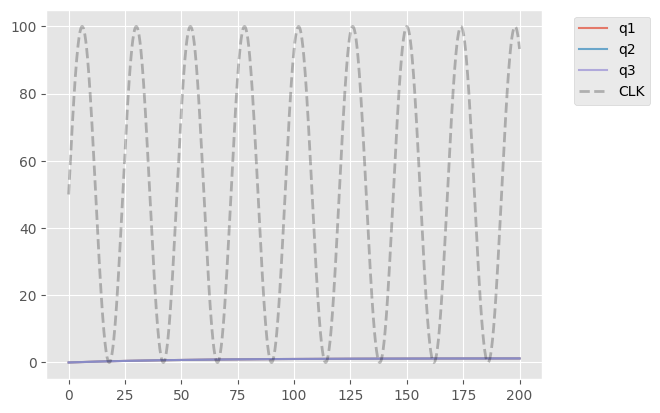

In [7]:
optimize(WhaleOptimizationAlgorithm, 100, 150)